In [5]:
import pandas as pd

df = pd.read_excel("data/calories.xlsx")
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [6]:
df.describe()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
count,2225,2225,2225,2225,2225
unique,44,1993,2,524,524
top,BakingIngredients,Roast Beef,100g,100 cal,420 kJ
freq,95,4,1802,26,26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [8]:
df["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [9]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

#Data Cleaning
- type cast objects to int
- change column names
- convert Cals_per100grams to int
- seperate liquids and solids to different dfs

In [10]:
#rename
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [11]:
df = df.rename(
    {"per100gram": "per100", "Cals_per100grams": "Calories", "KJ_per100grams": "kJ"}, axis=1
)

In [12]:
df.head()

,FoodCategory,FoodItem,per100grams,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [13]:
df["Calories"].str[:-4].astype(int)

0        62
1        48
2        92
3        88
4        54
       ... 
2220    617
2221    233
2222    717
2223    180
2224    286
Name: Calories, Length: 2225, dtype: int64

In [14]:
#reassign here in order to persist the changes
df["Calories"] = df["Calories"].str[:-4].astype(int)
df.head()

,FoodCategory,FoodItem,per100grams,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [15]:
#continue with kJ
df["kJ"] = df["kJ"].str[:-3].astype(int)

In [16]:
#value.counts is equal to a group by and count. aggregation + count of the unique values
df["per100grams"].value_counts()

per100grams
100g     1802
100ml     423
Name: count, dtype: int64

In [17]:
#seperate solids and liquids
#using a boolean mask. Then do a df of the mask of where it is True.
df_liquids = df[df["per100grams"]=='100ml']

In [18]:
#Can do the same but also doing it with query syntax
df_solids = df.query("per100grams == '100g'")

In [19]:
#find out top 5 categories with highest calories
#first look at sort values and top 5 items

solids_sorted = df_solids.sort_values(by = "Calories", ascending=False)
solids_sorted.iloc[:5]

,FoodCategory,FoodItem,per100grams,Calories,kJ
1621,Soups,Goulash,100g,1009,4238
1761,Oils&Fats,Lard,100g,902,3788
528,Beef&Veal,Beef Tallow,100g,902,3788
1756,Oils&Fats,Goose Fat,100g,898,3772
599,Meat,Chicken Fat,100g,898,3772


In [20]:
top5_liquids = df_liquids.sort_values("Calories", ascending=False).head()
top5_liquids

,FoodCategory,FoodItem,per100grams,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902
1800,VegetableOils,Salmon Oil,100ml,911,3826
1789,VegetableOils,Menhaden Oil,100ml,911,3826
1759,Oils&Fats,Herring Oil,100ml,902,3788


In [21]:
#top 5 categories. on entire dataset
top5_categories = df.groupby("FoodCategory")["Calories"].median("Calories").sort_values(ascending=False).iloc[:5].reset_index()
#reset index is turning this series object into a dataframe again.
top5_categories

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


[Text(0.5, 1.0, 'top5 categories')]

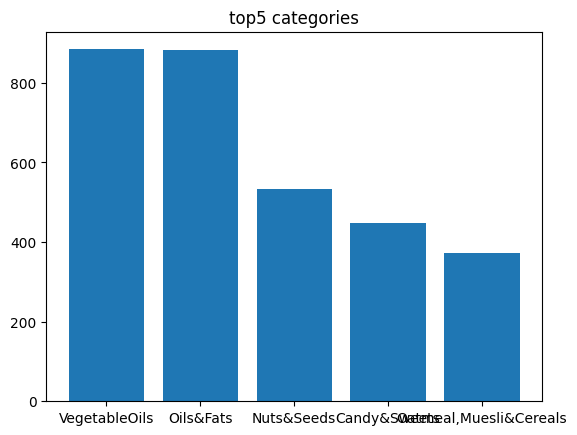

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.bar(top5_categories["FoodCategory"], top5_categories["Calories"])
ax.set(title="top5 categories")

In [23]:
df

,FoodCategory,FoodItem,per100grams,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260
1,CannedFruit,Canned Apricots,100g,48,202
2,CannedFruit,Canned Blackberries,100g,92,386
3,CannedFruit,Canned Blueberries,100g,88,370
4,CannedFruit,Canned Cherries,100g,54,227
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100g,617,2591
2221,Spreads,Tapenade,100g,233,979
2222,Spreads,Unsalted Butter,100g,717,3011
2223,Spreads,Vegemite,100g,180,756


In [24]:
import duckdb
duckdb.query(
    """
    SELECT FoodCategory, median(Calories) as median FROM df GROUP BY FoodCategory ORDER BY median DESC LIMIT 5
    """
).df()

,FoodCategory,median
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5
